In [1]:
"""
1. Import Global Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)

In [2]:
"""
2. Linear Regression
Source: Week 6 Notebook
"""

import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

np.set_printoptions(precision=4, suppress=True)


/Users/davidlarance/anaconda3/envs/ipykernal_py2/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [16]:
"""
3. Load Subsetted that was created in EDA notebook and target error from raw zillow file
Note to Sullivan: I had to reverse the slashes from back to forward to work
"""

# Load the pre-subsetted data
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')

# Load the label data
train_target = pd.read_csv('../Data/final/train_labels_processed.csv', sep=',', engine='python')
train_target_bin = pd.read_csv('../Data/final/train_labels_bin_processed.csv', sep=',', engine='python')
test_target = pd.read_csv('../Data/final/test_labels_processed.csv', sep=',', engine='python')
test_target_bin = pd.read_csv('../Data/final/test_labels_bin_processed.csv', sep=',', engine='python')



In [17]:
# 3. Check the data

# 3.1 Train data shape
# Check the shape of the train data
print("Train data shape:", train_data.shape)

# Check the shape of the targets
print("Train label data shape:", train_target.shape)
print("Train binarized label data shape:", train_target_bin.shape)

# 3.2 Test data shape
# Check the shape of the train data
print("Test data shape:", test_data.shape)

# Check the shape of the targets
print("Test label data shape:", test_target.shape)
print("Test binarized label data shape:", test_target_bin.shape)

print test_data.describe
print test_target.describe
print test_target_bin.describe


('Train data shape:', (130000, 34))
('Train label data shape:', (130000, 1))
('Train binarized label data shape:', (130000, 1))
('Test data shape:', (37854, 34))
('Test label data shape:', (37854, 1))
('Test binarized label data shape:', (37854, 1))
<bound method DataFrame.describe of        airconditioningtypeid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0                  -0.649030    -0.286898   -0.035763               0.870451   
1                  -0.649030     0.214079   -0.905427              -1.300895   
2                   1.232510    -0.286898   -0.905427               1.006160   
3                   1.232510    -1.288850   -1.775090               1.006160   
4                  -0.649030    -0.286898   -0.035763               0.734742   
5                  -0.649030    -1.288850   -0.905427               0.734742   
6                  -0.649030     0.715055    0.833900               0.870451   
7                   1.232510     0.715055   -0.035763               0.4633

In [18]:
# 4. Prep the data

# 4.1 Remove non int or float columns - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.select_dtypes(['float64','int64'])

# 4.2 Remove columns from the data matrix that contain Nan values - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.dropna(axis=1, how='any')
# If we'd rather just remove rows with a Nan, we'd need to change the axis to 0


print 'data shape: ', train_data.shape
print 'labels shape: ', train_target.shape
print 'labels bin shape: ', train_target_bin.shape
# train_data = train_data.drop([0,0])

# 4.3.1 Set the training X, Y, and Y(binarized labels) variables
X, Y, Yb = np.asarray(train_data), np.asarray(train_target), np.asarray(train_target_bin)

# 4.3.2 Set the test X, Y, and Y(binarized labels) variables
U, V, Vb = np.asarray(test_data), np.asarray(test_target), np.asarray(test_target_bin)

print 'data shape: ', X.shape
print 'labels shape: ', Y.shape
print 'labels bin shape: ', train_target_bin.shape

# # 4.4 Shuffle the variables
# # NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
# shuffle = np.random.permutation(np.arange(X.shape[0]))
# X, Y, Yb = X[shuffle], Y[shuffle], Yb[shuffle]

# print 'data shape: ', X.shape
# print 'target shape: ', Y.shape
# print 'target (binarized) shape: ', Yb.shape

# # # 4.5 Create different arrays for training and testing data.
# train_data, train_labels, train_labels_bin = X[:130000], Y[:130000], Yb[:130000]
# mini_train_data, mini_train_labels, mini_train_labels_bin = X[:1000], Y[:1000], Yb[:1000]
# test_data, test_labels, test_labels_bin = X[130000:], Y[130000:], Yb[130000:]

data shape:  (130000, 34)
labels shape:  (130000, 1)
labels bin shape:  (130000, 1)
data shape:  (130000, 34)
labels shape:  (130000, 1)
labels bin shape:  (130000, 1)


In [24]:
# 5. Create, fit the Linear Regression classifier

# 5.1 Create and fit
linr =  LinearRegression()
linr.fit(X, Y)

# 5.2 Print the resulting model
print 'Estimated intercept:', linr.intercept_

print 'Estimated coefficients:', linr.coef_


Estimated intercept: [0.0141]
Estimated coefficients: [[-0.0012  0.0213  0.0022 -0.0055  0.015   0.0029  0.01   -0.0022 -0.0025
  -0.0374  0.0009 -0.0014 -0.0032 -0.001   0.001   0.0023 -0.0036 -0.0001
   0.0013 -0.0001  0.0085 -0.0009  0.0033 -0.0061 -0.0001 -0.0014 -0.0005
  -0.001  -0.078   0.2335  0.0022 -0.1607 -0.0238  0.0035]]


Mean Squared Error:  0.026274520241358103
Variance Score:  0.0035098073305424027


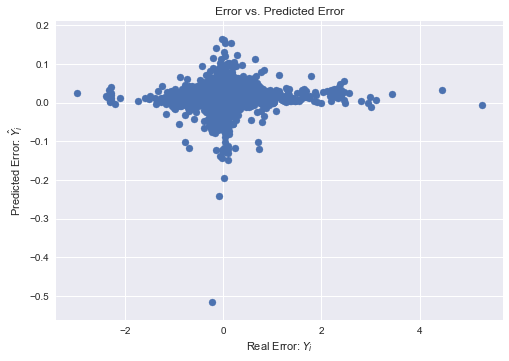

In [25]:
# 6. Test the accuracy of the classifier

# Start by plotting the train labels against the predicted data 
plt.scatter(V, linr.predict(U))
plt.xlabel("Real Error: $Y_i$")
plt.ylabel("Predicted Error: $\hat{Y}_i$")
plt.title("Error vs. Predicted Error")

# Calculate the mean square error
mse = np.mean((linr.predict(U)-V)**2)
print 'Mean Squared Error: ', mse

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
var_score = linr.score(U, V)
print 'Variance Score: ', var_score
        